ÁªèËøáÂ∞ùËØïÂèëÁé∞jiebaÂàÜËØç‰∏≠ÂÖ≥ÈîÆËØçÊèêÂèñË°®Áé∞ÊúÄÂ•Ω„ÄÇÂú®ËøôÈáåÂØπÊØî‰∫ÜjiebaÂÖ≥ÈîÆËØçÊèêÂèñ„ÄÅjiebaÂàÜËØç‰∏épkusegÁöÑË°®Áé∞„ÄÇÂÖ∂‰∏≠ÊâÄÊúâÊñπÊ≥ïÈÉΩÂéªÈô§‰∫ÜÂÅúÊ≠¢ËØç„ÄÇpkuseg‰∏≠‰ΩøÁî®‰∫Ü"web"Ê®°ÂûãÔºàÂç≥Âú®ÂæÆÂçöËØ≠ÊñôËÆ≠ÁªÉÁöÑÊ®°ÂûãÔºâÔºå‰ΩÜÊú™Âä†ÂÖ•ËØçÂÖ∏„ÄÇ

Ê∏£‰ª£Á†ÅË≠¶ÂëäÔºöÊ≤°ÊúâÁâπÂà´‰ºòÂåñËøáÔºåÈöè‰æøÂÜôÁöÑ„ÄÇ

ÂçïÁ∫øÁ®ãË≠¶ÂëäÔºöÁî±‰∫éÊ≤°Êúâ‰ºòÂåñËøá‰ª£Á†ÅÂä†‰∏äjupyter notebookÁöÑÁºòÊïÖÔºåÂè™ËÉΩË∑ëÂçïÁ∫øÁ®ã„ÄÇÂõ†Ê≠§‰Ω†ÁöÑÂ∞èÁîµËÑëÂèØËÉΩÈúÄË¶ÅË∑ë‰∏ÄÊÆµÊó∂Èó¥„ÄÇ

ÂÜÖÂ≠òË≠¶ÂëäÔºöËøô‰∏™‰ª£Á†ÅÊØîËæÉÂêÉÂÜÖÂ≠òÔºàÂ∞§ÂÖ∂ÊòØÂõæÁâáÊòæÁ§∫„ÄÇË∞É‰Ωécreate_wordcloudÂáΩÊï∞‰∏≠ÁöÑdpiÂíåscale‰ºöÂä†Âø´ÂõæÁâáÊòæÁ§∫ÂíåÂáèÂ∞èÂÜÖÂ≠òÔºâ„ÄÇ

In [1]:
import numpy as np
import wordcloud
import matplotlib.pyplot as plt
from PIL import Image
import pkuseg
import jieba
import jieba.analyse
jieba.load_userdict('ËØçÂÖ∏.txt')
#https://github.com/goto456/stopwords/
jieba.analyse.set_stop_words('ÂÅúÁî®ËØçË°®.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Administrator\AppData\Local\Temp\jieba.cache
Loading model cost 0.815 seconds.
Prefix dict has been built succesfully.


In [2]:
# Âä†ËΩΩÊï∞ÊçÆ
comment_data = np.load('comment_cleaned.npz')["arr_0"]

In [3]:
def add_count(count, element_list):
    for element in element_list:
        if str(element) in count.keys():
            count[str(element)] += 1
        else:
            count[str(element)] = 1
    return count


def merge_two_dicts(x, y):
    return {k: x.get(k, 0) + y.get(k, 0) for k in set(x) | set(y)}


def stopwordslist(file_path):
    stopwords = [
        line.strip() for line in open(file_path, encoding='UTF-8').readlines()
    ]
    return stopwords


def create_wordcloud(word_count,
                     mask=None,
                     color_with_mask=False,
                     height=8,
                     weigth=8,
                     dpi=400,
                     scale=32,
                     save_name=None):
    if mask:
        mask = np.array(Image.open(mask))  # ÂÆö‰πâËØçÈ¢ëËÉåÊôØ
    else:
        color_with_mask = None  #Á°Æ‰øùÂú®ÊúâmaskÂõæÂÉèÊó∂ÂÜç‰ΩøÁî®color_with_mask
    wc = wordcloud.WordCloud(
        font_path='C:/Windows/Fonts/simhei.ttf',  # ËÆæÁΩÆÂ≠ó‰ΩìÊ†ºÂºè
        mask=mask,  # ËÆæÁΩÆËÉåÊôØÂõæ
        max_words=200,  # ÊúÄÂ§öÊòæÁ§∫ËØçÊï∞
        max_font_size=100,  # Â≠ó‰ΩìÊúÄÂ§ßÂÄº
        scale=scale,  # ËßÑÊ®°/ÂàÜËæ®Áéá/Ê∏ÖÊô∞Á®ãÂ∫¶
        # background_color="white",
    )
    plt.figure(figsize=(height, weigth), dpi=dpi)
    wc.generate_from_frequencies(word_count)  # ‰ªéÂ≠óÂÖ∏ÁîüÊàêËØç‰∫ë
    if color_with_mask:
        image_colors = wordcloud.ImageColorGenerator(mask)  # ‰ªéËÉåÊôØÂõæÂª∫Á´ãÈ¢úËâ≤ÊñπÊ°à
        wc.recolor(color_func=image_colors)  # Â∞ÜËØç‰∫ëÈ¢úËâ≤ËÆæÁΩÆ‰∏∫ËÉåÊôØÂõæÊñπÊ°à
    plt.imshow(wc)  # ÊòæÁ§∫ËØç‰∫ë
    plt.axis('off')  # ÂÖ≥Èó≠ÂùêÊ†áËΩ¥
    if save_name:
        plt.savefig(save_name)
    plt.show()  # ÊòæÁ§∫ÂõæÂÉè

# ÁªìÂ∑¥ÂÖ≥ÈîÆËØçÊèêÂèñ

In [4]:
comment_join = ''.join(comment_data) #ÈúÄË¶ÅÂÖàÊääËØÑËÆ∫ÂêàÂπ∂ÊâçËÉΩÊèêÂèñÂÖ≥ÈîÆËØç
tags = jieba.analyse.extract_tags(comment_join, topK=200, withWeight=True) #ÊèêÂèñÂâç‰∏§Áôæ‰∏™ÂÖ≥ÈîÆËØç

In [5]:
print({name:round(value,4) for name,value in dict(tags[:100]).items()}) #Êü•ÁúãÂâç‰∏ÄÁôæÁöÑËØçÈ¢ë

{'Â≠ôÂì•': 0.1601, 'Â∏¶Âì•': 0.0921, 'Êó†ÂÜÖÈ¨º': 0.0608, 'ËøõÊù•': 0.0585, 'ÁúüÁöÑ': 0.0465, 'gkd': 0.0465, 'Á≤â‰∏ù': 0.0464, 'ÂºüÂºü': 0.0462, 'ÂæÆÂçö': 0.0453, 'Â≠ôÁ¨ëÂ∑ù': 0.0449, 'ÂìàÂìàÂìà': 0.0429, 'Â≠ôÁãó': 0.0419, 'ÂëúÂëú': 0.0393, 'ÂØªÊÄù': 0.0311, 'Êàë‰Ωõ': 0.0302, 'Ëî°ÂæêÂù§': 0.0295, 'kkp': 0.0276, 'ÂÆâÊéí': 0.0271, 'ÂéüÂõæ': 0.0267, 'biss': 0.0266, 'Âª∫ËÆÆ': 0.0262, 'ËØÑËÆ∫': 0.0261, 'ÂÜ≤ÂÜ≤': 0.025, 'ÂÆå‰∫ã': 0.025, 'ÁâõÊâπ': 0.0247, 'tony': 0.0245, 'Â¥ΩÁßç': 0.0242, 'ÁéØËäÇ': 0.0231, 'nmsl': 0.0223, 'ÂõûÂ§ç': 0.021, 'ÂáªÊØô': 0.0199, 'ÂñúÊ¨¢': 0.0194, 'Â±ûÂÆû': 0.0191, '‰ªäÊôö': 0.0189, 'ÈìÅÊ±Å': 0.0188, 'Áõ¥Êí≠': 0.0188, '‰∏™Â¥ΩÁßç': 0.0187, 'Âì•Âì•': 0.0187, 'Âè∏È©¨': 0.0178, 'ÊäΩË±°': 0.0177, 'ÊòéÊòü': 0.0175, 'Âä†Â§ßÂäõÂ∫¶': 0.0168, 'Âø´ÁÇπ': 0.0167, 'ÊöóÁ§∫': 0.0166, 'ÂíñÂñ±': 0.0164, '‰∏Ä‰∏™': 0.0158, 'ÊÅ∂‰∫∫': 0.0157, '‰∏ÄÂìà': 0.0151, 'hape': 0.015, 'ÊøÄÂÖâ': 0.0149, 'ËÄÅÂ≠ê': 0.0148, 'Ê±ÇÊ±Ç': 0.0143, 'ikun': 0.014, 'ÊÅ∞‰∏™': 0.0139, 'ÊéíÈù¢': 0.0138, 'Âà´‰∫∫':

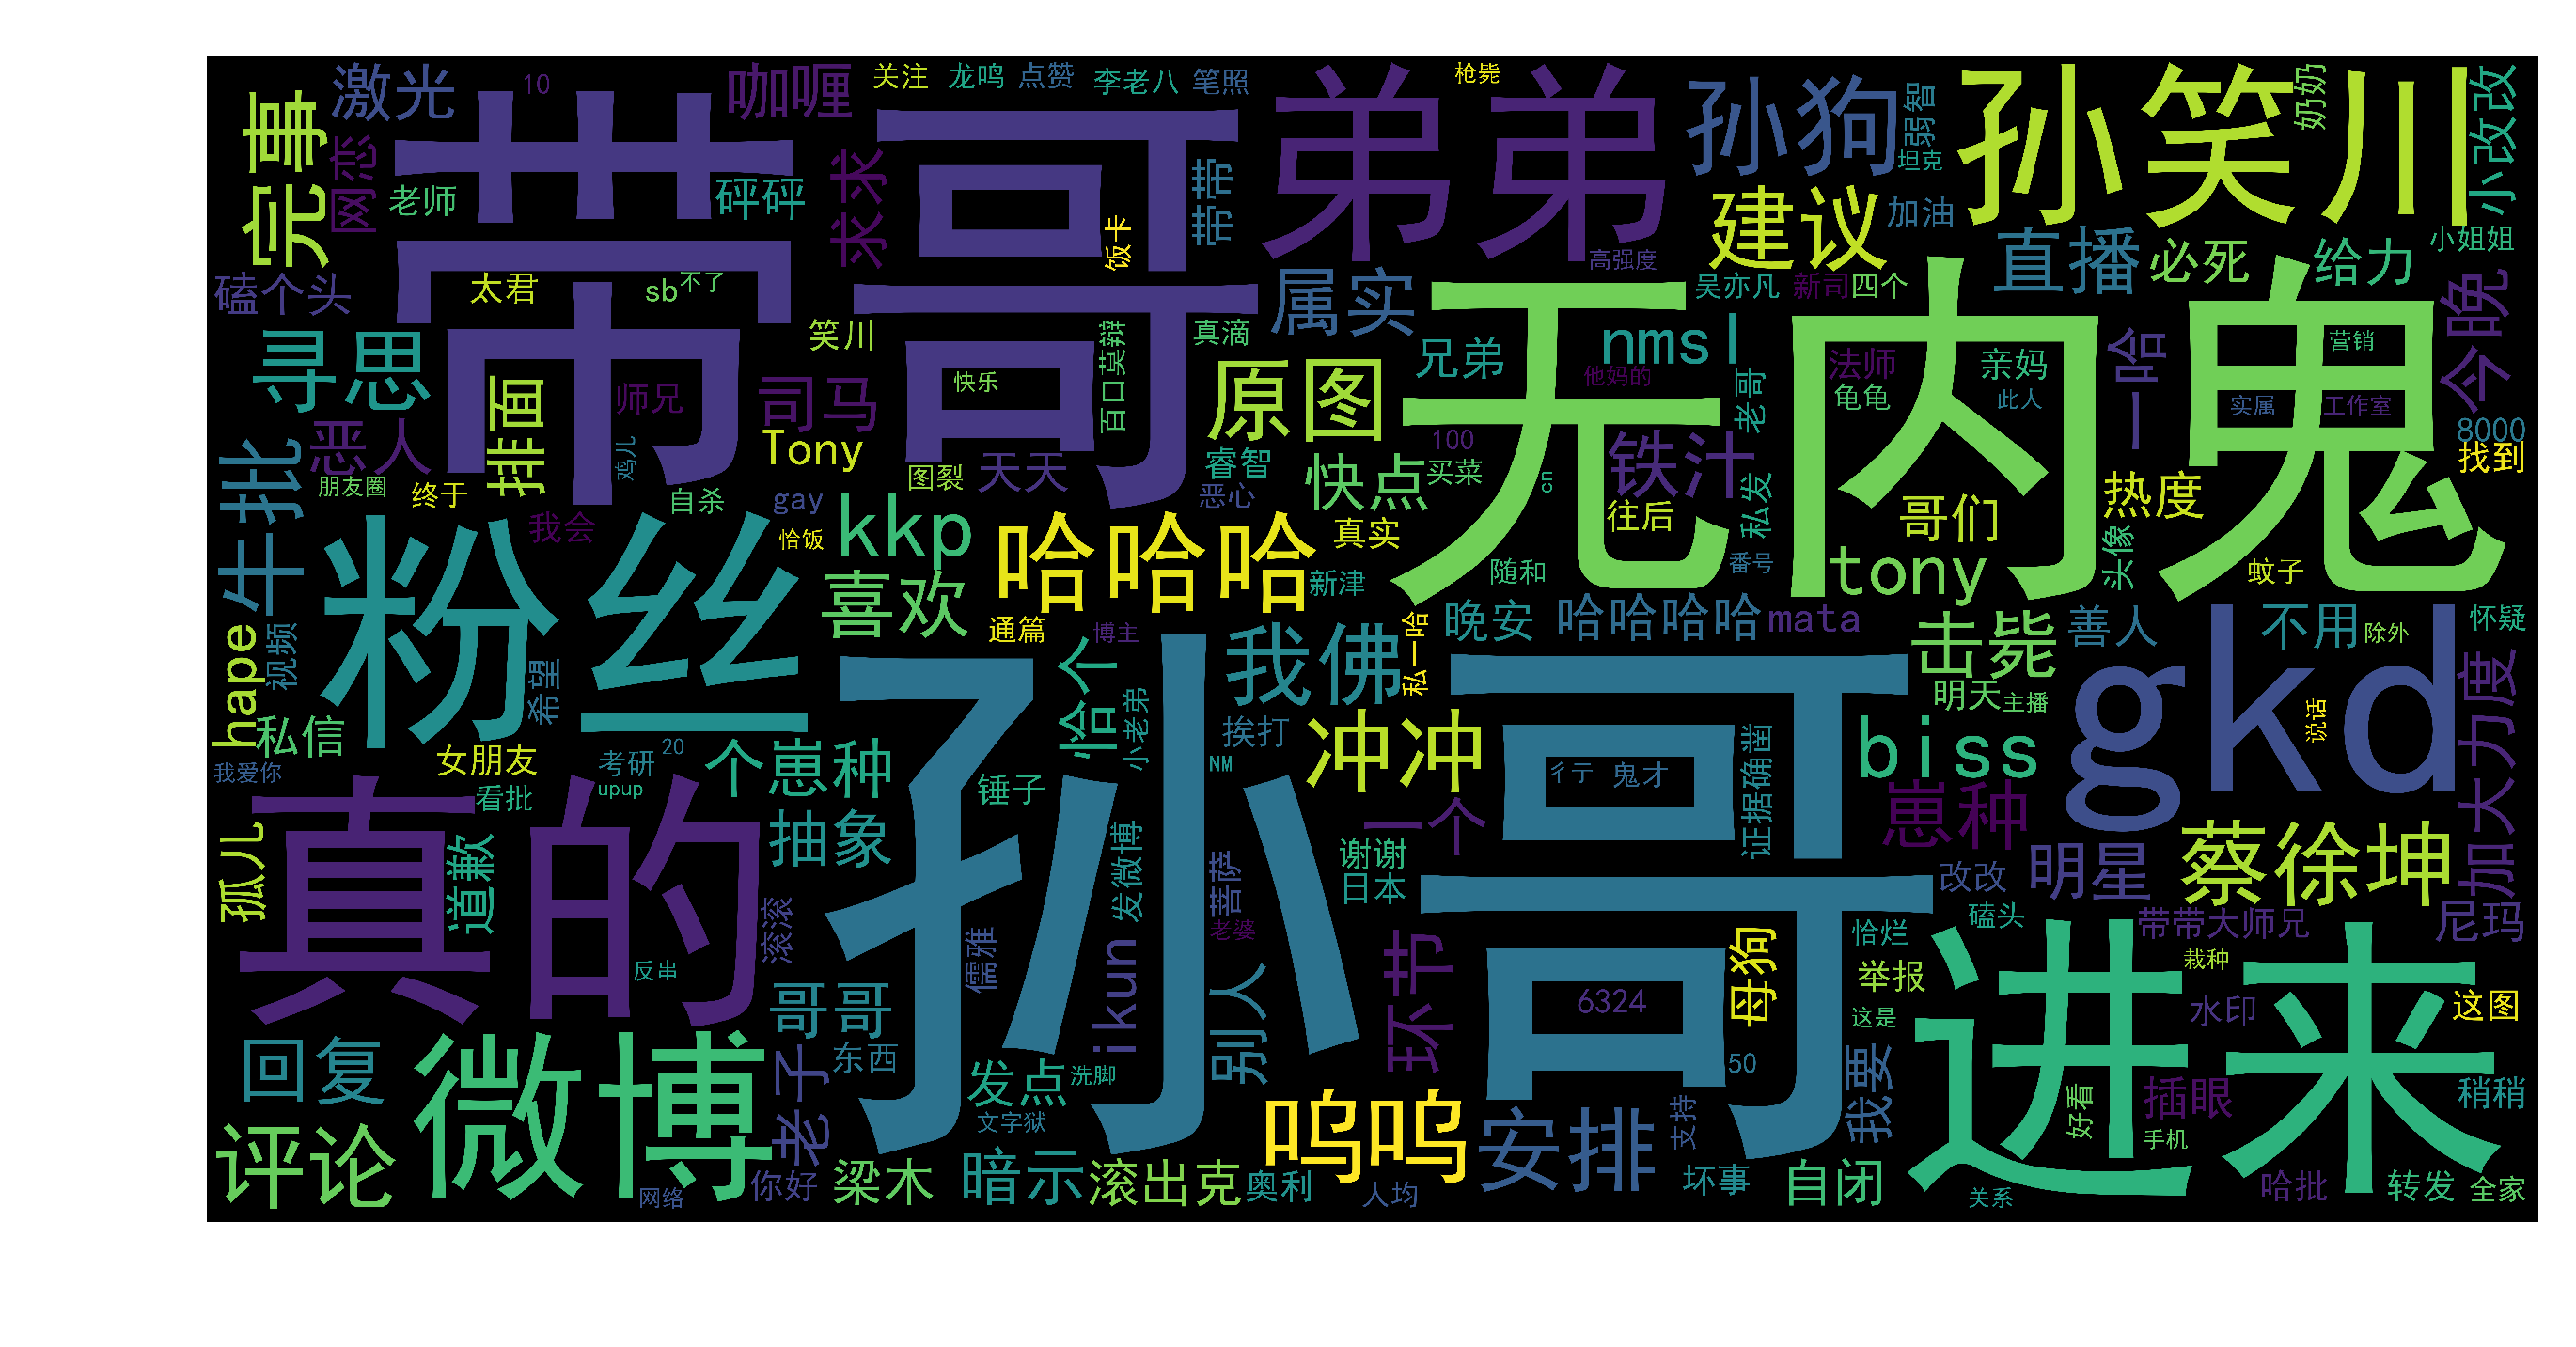

In [6]:
create_wordcloud(dict(tags))

# ÁªìÂ∑¥ÂàÜËØç

In [7]:
word_count_jieba = {}
for comment in comment_data:
    word_list_jieba = jieba.cut(comment)
    word_count_jieba = add_count(word_count_jieba, word_list_jieba)

stopwords = stopwordslist('ÂÅúÁî®ËØçË°®.txt')
word_count_jieba_without_stopword = {}
for word, freq in word_count_jieba.items():
    if word not in stopwords:
        word_count_jieba_without_stopword[word] = freq

word_count_jieba_without_stopword_sort = sorted(word_count_jieba_without_stopword.items(),
                                          key=lambda item: int(item[1]),
                                          reverse=True)

In [8]:
print(word_count_jieba_without_stopword_sort[:100]) #Êü•ÁúãÂâç‰∏ÄÁôæÁöÑËØçÈ¢ë

[(' ', 784215), ('Ôºå', 662491), ('Ôºü', 444453), ('„ÄÇ', 110164), ('ÔºÅ', 87056), ('ÈÉΩ', 82297), ('‰∏ç', 80166), ('Â≠ôÂì•', 64940), ('ËØ¥', 61287), ('ÂöØ', 57589), ('‰∫∫', 55843), ('Â∏¶', 54914), ('Ëøò', 54892), ('Ô∏è', 53371), ('ËøõÊù•', 49255), ('Áúã', 47272), ('Âó∑', 44314), ('Ê≠ª', 41293), ('ÁúüÁöÑ', 39995), ('Â∏¶Âì•', 38979), ('Ê≤°', 36913), ('‰∏∂', 35633), ('Â•Ω', 35443), ('Â≠ô', 33904), ('ÂºüÂºü', 30957), ('Âéª', 29061), ('¬ø', 27790), ('/', 27625), ('‰∏Ä‰∏™', 27134), ('‰∏ä', 26623), ('8', 26398), ('ÊÉ≥', 25130), ('Ëá≠', 25084), ('Êó†ÂÜÖÈ¨º', 24620), ('Âª∫ËÆÆ', 24204), ('Á≤â‰∏ù', 24116), ('ÂÆâÊéí', 22753), ('gkd', 22000), ('ÂëúÂëú', 21814), ('ÂìàÂìàÂìà', 21038), ('Â¶à', 20656), ('Âèë', 19660), (':', 19516), ('Êàë‰Ωõ', 19454), ('ÈÄè', 18948), ('ÂæÆÂçö', 18947), ('ÂØªÊÄù', 18757), ('ËØÑËÆ∫', 18623), ('.', 18491), ('Âù§', 18487), ('Â≠ôÁ¨ëÂ∑ù', 18182), ('Êêû', 18141), ('Á¨ë', 17732), ('ÂøÖ', 17221), ('Â≠ôÁãó', 16999), ('Ôºö', 16640), ('ÂñúÊ¨¢', 16480), ('‰ºö', 16413), ('ÊÜ®', 1632

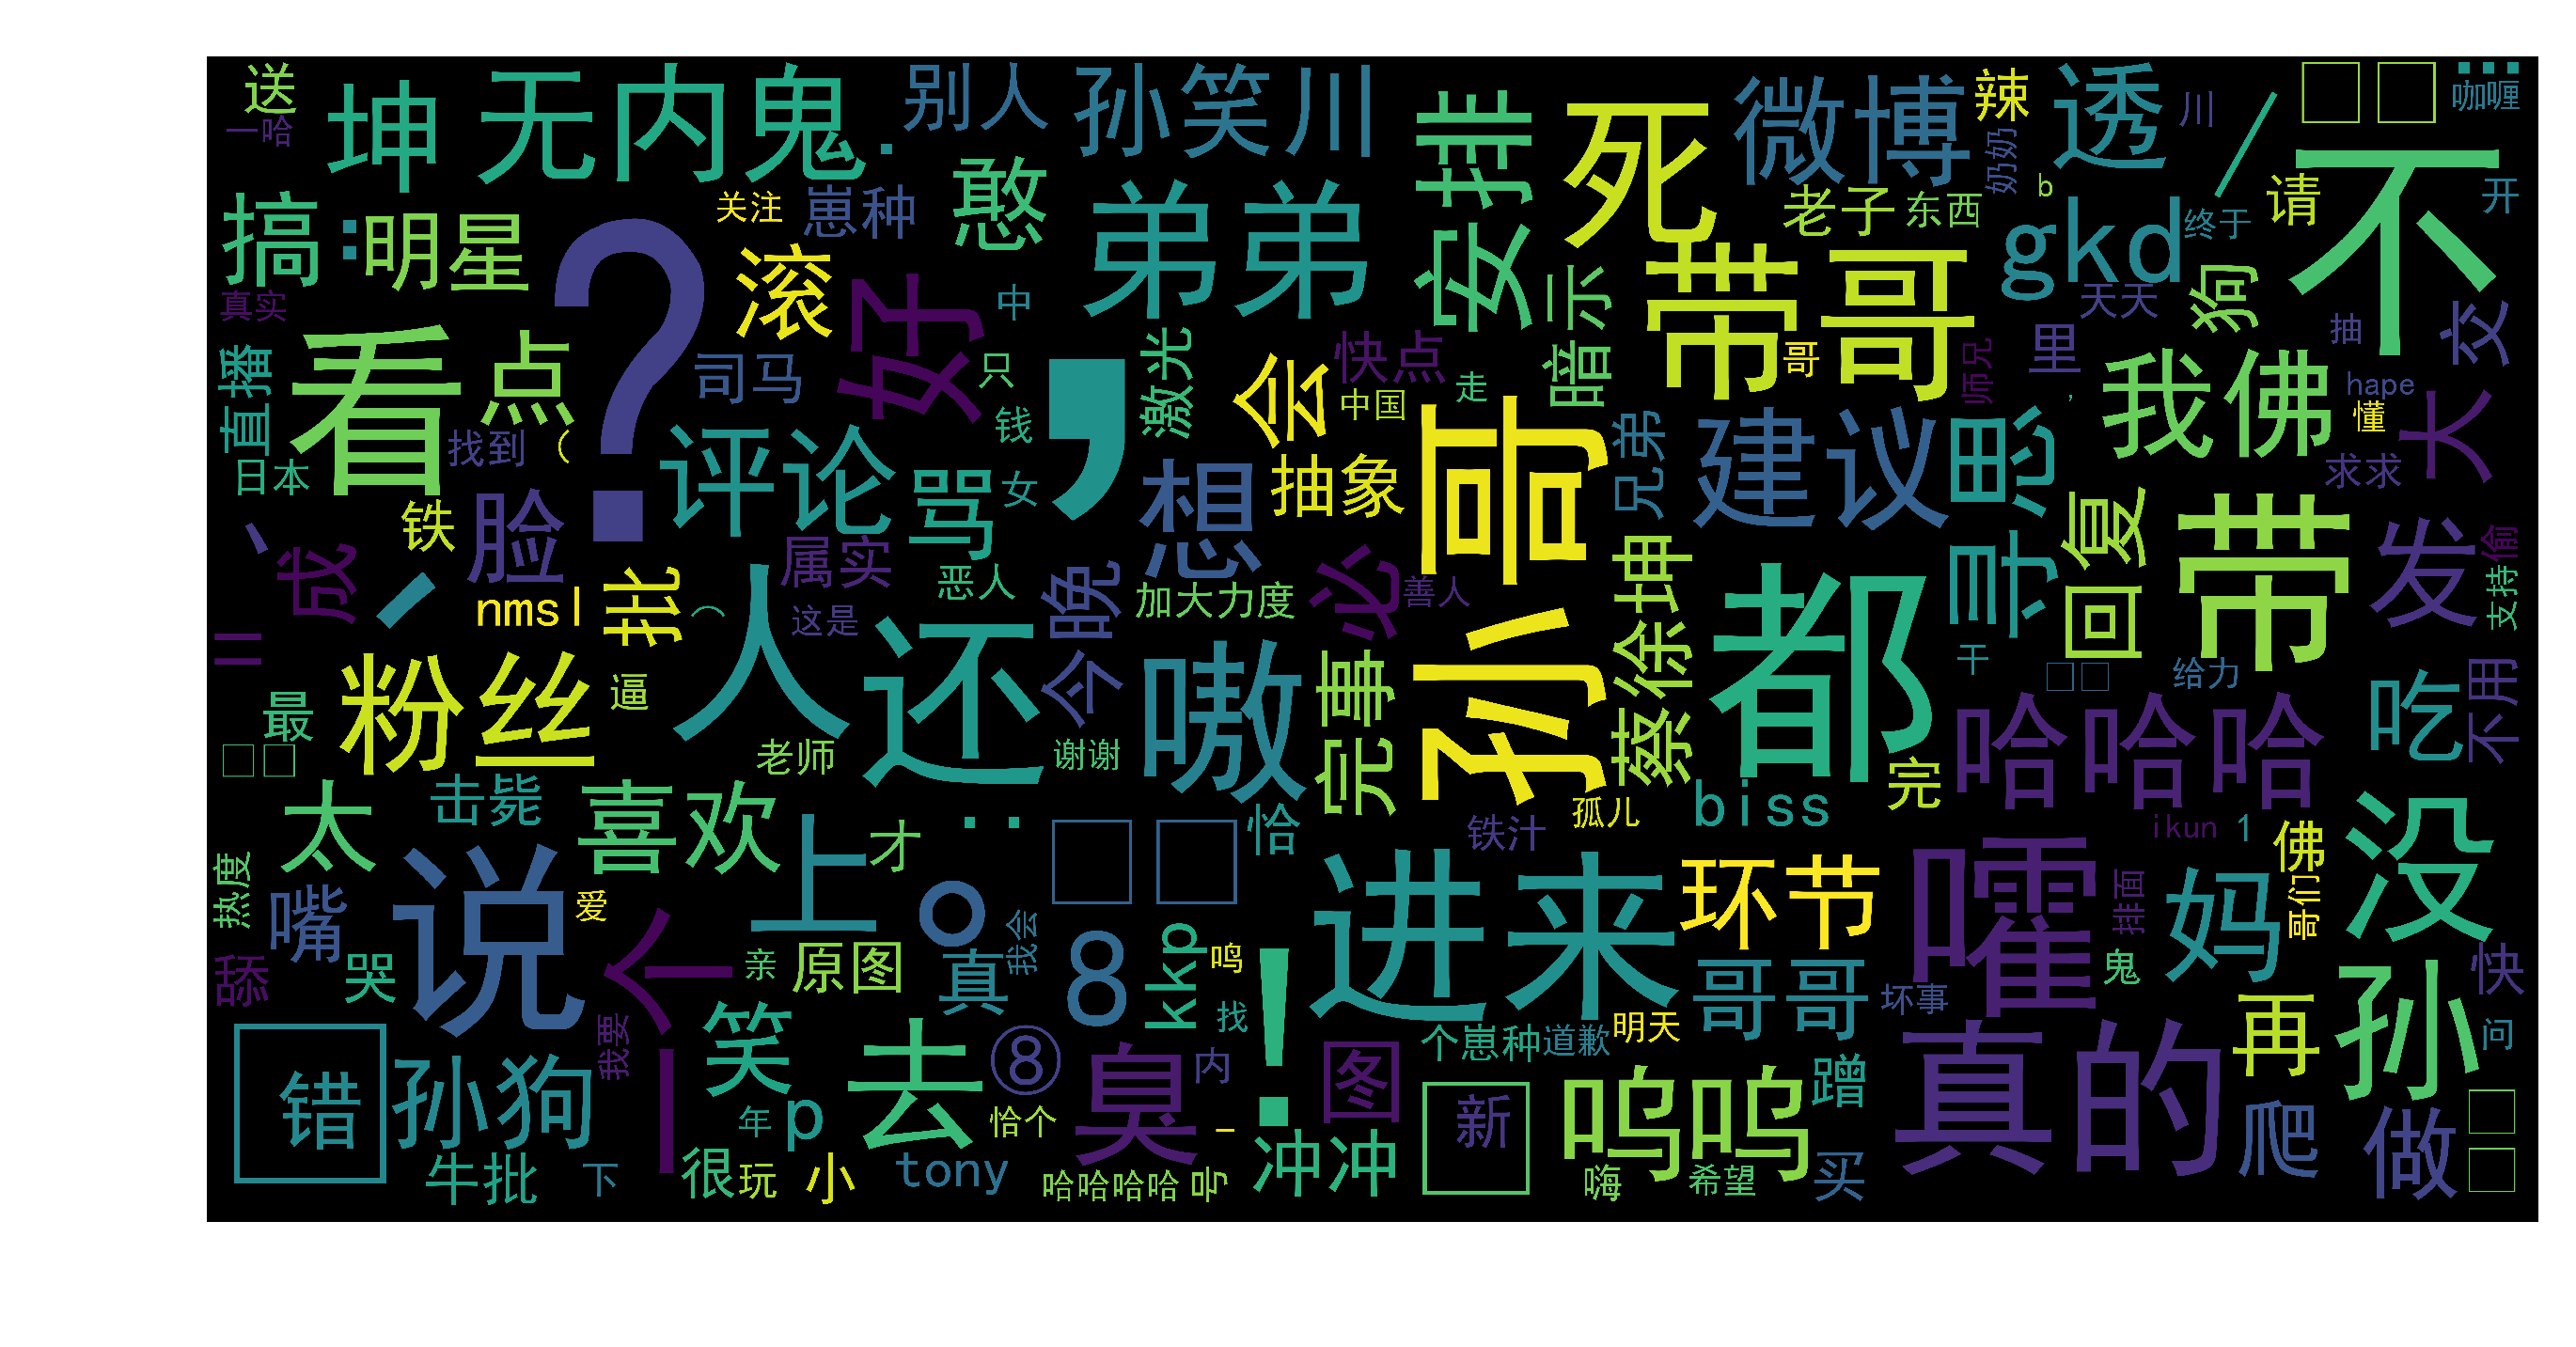

In [9]:
create_wordcloud(dict(word_count_jieba_without_stopword_sort)) 

# pkusegÂ∫ì

In [10]:
seg = pkuseg.pkuseg(model_name='web')
word_count_pkusge = {}
for comment in comment_data:
    word_list_pkuseg = seg.cut(comment)
    word_count_pkusge = add_count(word_count_pkusge, word_list_pkuseg)

stopwords = stopwordslist('ÂÅúÁî®ËØçË°®.txt')
word_count_pkuseg_without_stopword = {}
for word, freq in word_count_pkusge.items():
    if word not in stopwords:
        word_count_pkuseg_without_stopword[word] = freq

word_count_pkuseg_without_stopword_sort = sorted(word_count_pkuseg_without_stopword.items(),
                                          key=lambda item: int(item[1]),
                                          reverse=True)


In [11]:
print(word_count_pkuseg_without_stopword_sort[:100]) #Êü•ÁúãÂâç‰∏ÄÁôæÁöÑËØçÈ¢ë

[('Ôºå', 659348), ('Ôºü', 372157), ('‰∏ç', 160808), ('„ÄÇ', 97212), ('ÈÉΩ', 81967), ('ÔºÅ', 79449), ('‰∫∫', 67155), ('Â≠ôÂì•', 63024), ('ËØ¥', 61053), ('Áúã', 60756), ('Ëøò', 58857), ('Ê≤°', 52242), ('ËøõÊù•', 48118), ('Â∏¶Âì•', 41815), ('Â∏¶', 40351), ('‰ºö', 39543), ('Â•Ω', 37616), ('Âó∑', 37112), ('Â§™', 34904), ('ÊÉ≥', 34747), ('Ê≠ª', 32733), ('Âéª', 31248), ('‰∏Ä‰∏™', 29765), ('ÁúüÁöÑ', 29597), ('Êó†', 29380), ('ÂæÆÂçö', 28206), ('‰Ωõ', 27800), ('‰∏ä', 27311), ('ÂÜÖÈ¨º', 27290), ('Áúü', 26333), ('Âª∫ËÆÆ', 24284), ('ÂºüÂºü', 23749), ('8', 23205), ('Á≤â‰∏ù', 22594), ('ÂÆâÊéí', 22399), ('Â≠ô', 21657), ('Âèë', 20332), ('gkd', 19843), ('‰∏∂', 19670), ('ÂøÖ', 18800), ('Ô∏è', 18761), ('ÂØªÊÄù', 18123), ('ÈÄè', 17707), ('ËØÑËÆ∫', 17681), ('Êâπ', 17224), ('ÂÜç', 16754), ('¬ø', 16600), ('ÂêÉ', 16478), ('ÂñúÊ¨¢', 16440), ('Ôºö', 16176), ('Â∞è', 15962), ('Êªö', 15767), ('„ÄÅ', 15570), ('ÂÅö', 15347), ('ÂëúÂëú', 15065), ('ÁÇπ', 15047), ('Â≠ôÁ¨ëÂ∑ù', 15032), ('Â≠ôÁãó', 14795), ('ÁéØËäÇ', 14763)

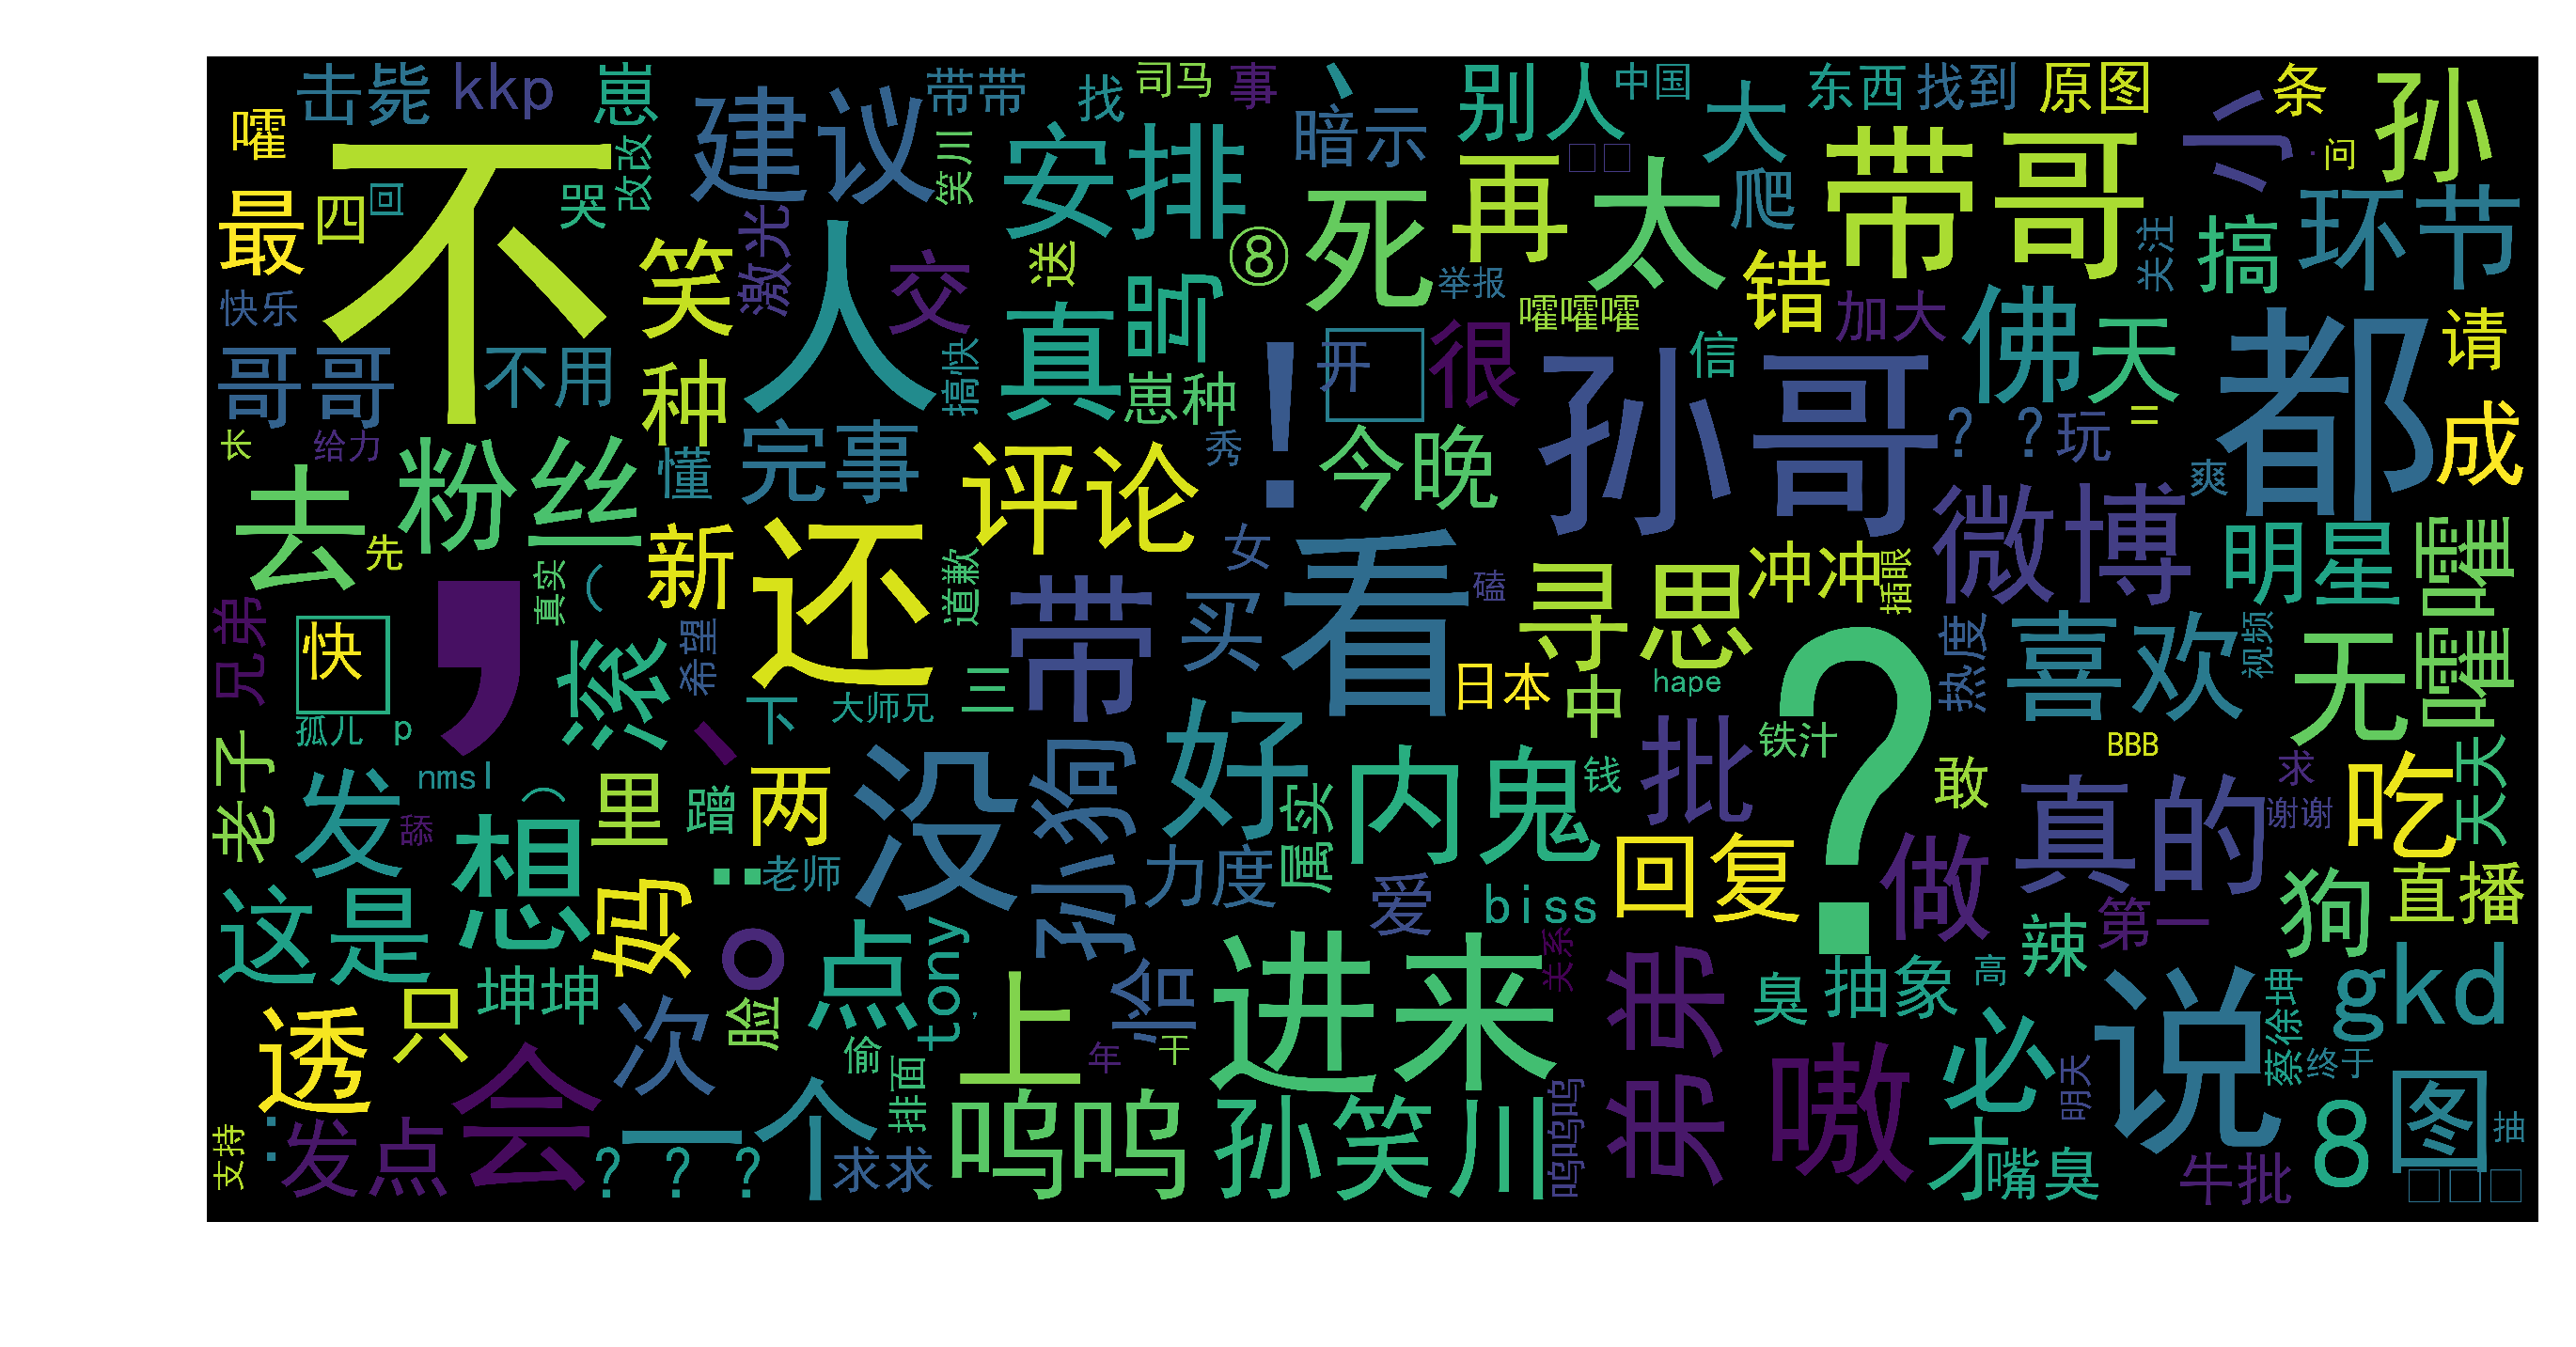

In [12]:
create_wordcloud(dict(word_count_pkuseg_without_stopword_sort)) 

ÂèØ‰ª•ÁúãÂà∞ÔºåËôΩÁÑ∂ÂàÜËØçÂèØ‰ª•ÊèêÂèñÂá∫‰∏Ä‰∫õÊäΩË±°ËØù‰∏≠ÁöÑÂä®ËØçËøòÊúâÁâπÊÆäÁ¨¶Âè∑ÔºàÂ¶Ç‚Äú¬ø‚ÄùÔºâÔºå‰ΩÜÊòØÂÖ∂‰∏≠Â§πÊùÇ‰∫ÜËÆ∏Â§öÊ†áÁÇπÁ¨¶Âè∑‰∏éemojiÔºåÊèêÂèñÂá∫ÁöÑËØçËØ≠‰πüÊõ¥Âä†Áü≠„ÄÇËøô‰ΩøÂæóÊèêÂèñÁöÑËØçÊõ¥ÁêêÁ¢éÔºå‰∏çÂà©‰∫éËßÇÂØü„ÄÇËÄåÂÖ≥ÈîÆËØçÊèêÂèñÂàôÂæàÂ•ΩÁöÑÊèêÂèñÂá∫‰∫ÜÊäΩË±°ËØù‰∏≠ÁöÑÂêçËØçÂÖ≥ÈîÆËØçÔºàÁîöËá≥Â¶Ç8000ÔºåbissÁ≠âÔºâÔºåÂèØËßÜÂåñÊïàÊûúÊõ¥Â•Ω„ÄÇ

Â¶ÇÊûúÊÉ≥Ë¶ÅÁôΩËâ≤ËÉåÊôØÁöÑËØç‰∫ëÂèØ‰ª•Â∞Ü‚Äú# background_color="white",‚ÄùÊ≥®ÈáäÊéâ„ÄÇ‰∏çËøá‰∏™‰∫∫ÊÑüËßâÈªëËâ≤Êõ¥Â•Ω‰∏ÄÁÇπ„ÄÇ

ÊúÄÂêéÔºåÁªôËØç‰∫ëÂ•ó‰∏Ä‰∏™ËÉåÊôØÂõæÔºå‰∏Ä‰∏ãÂ≠êÂ∞±ÂÑíÈõÖÈöèÂíåËµ∑Êù•‰∫ÜÔºö

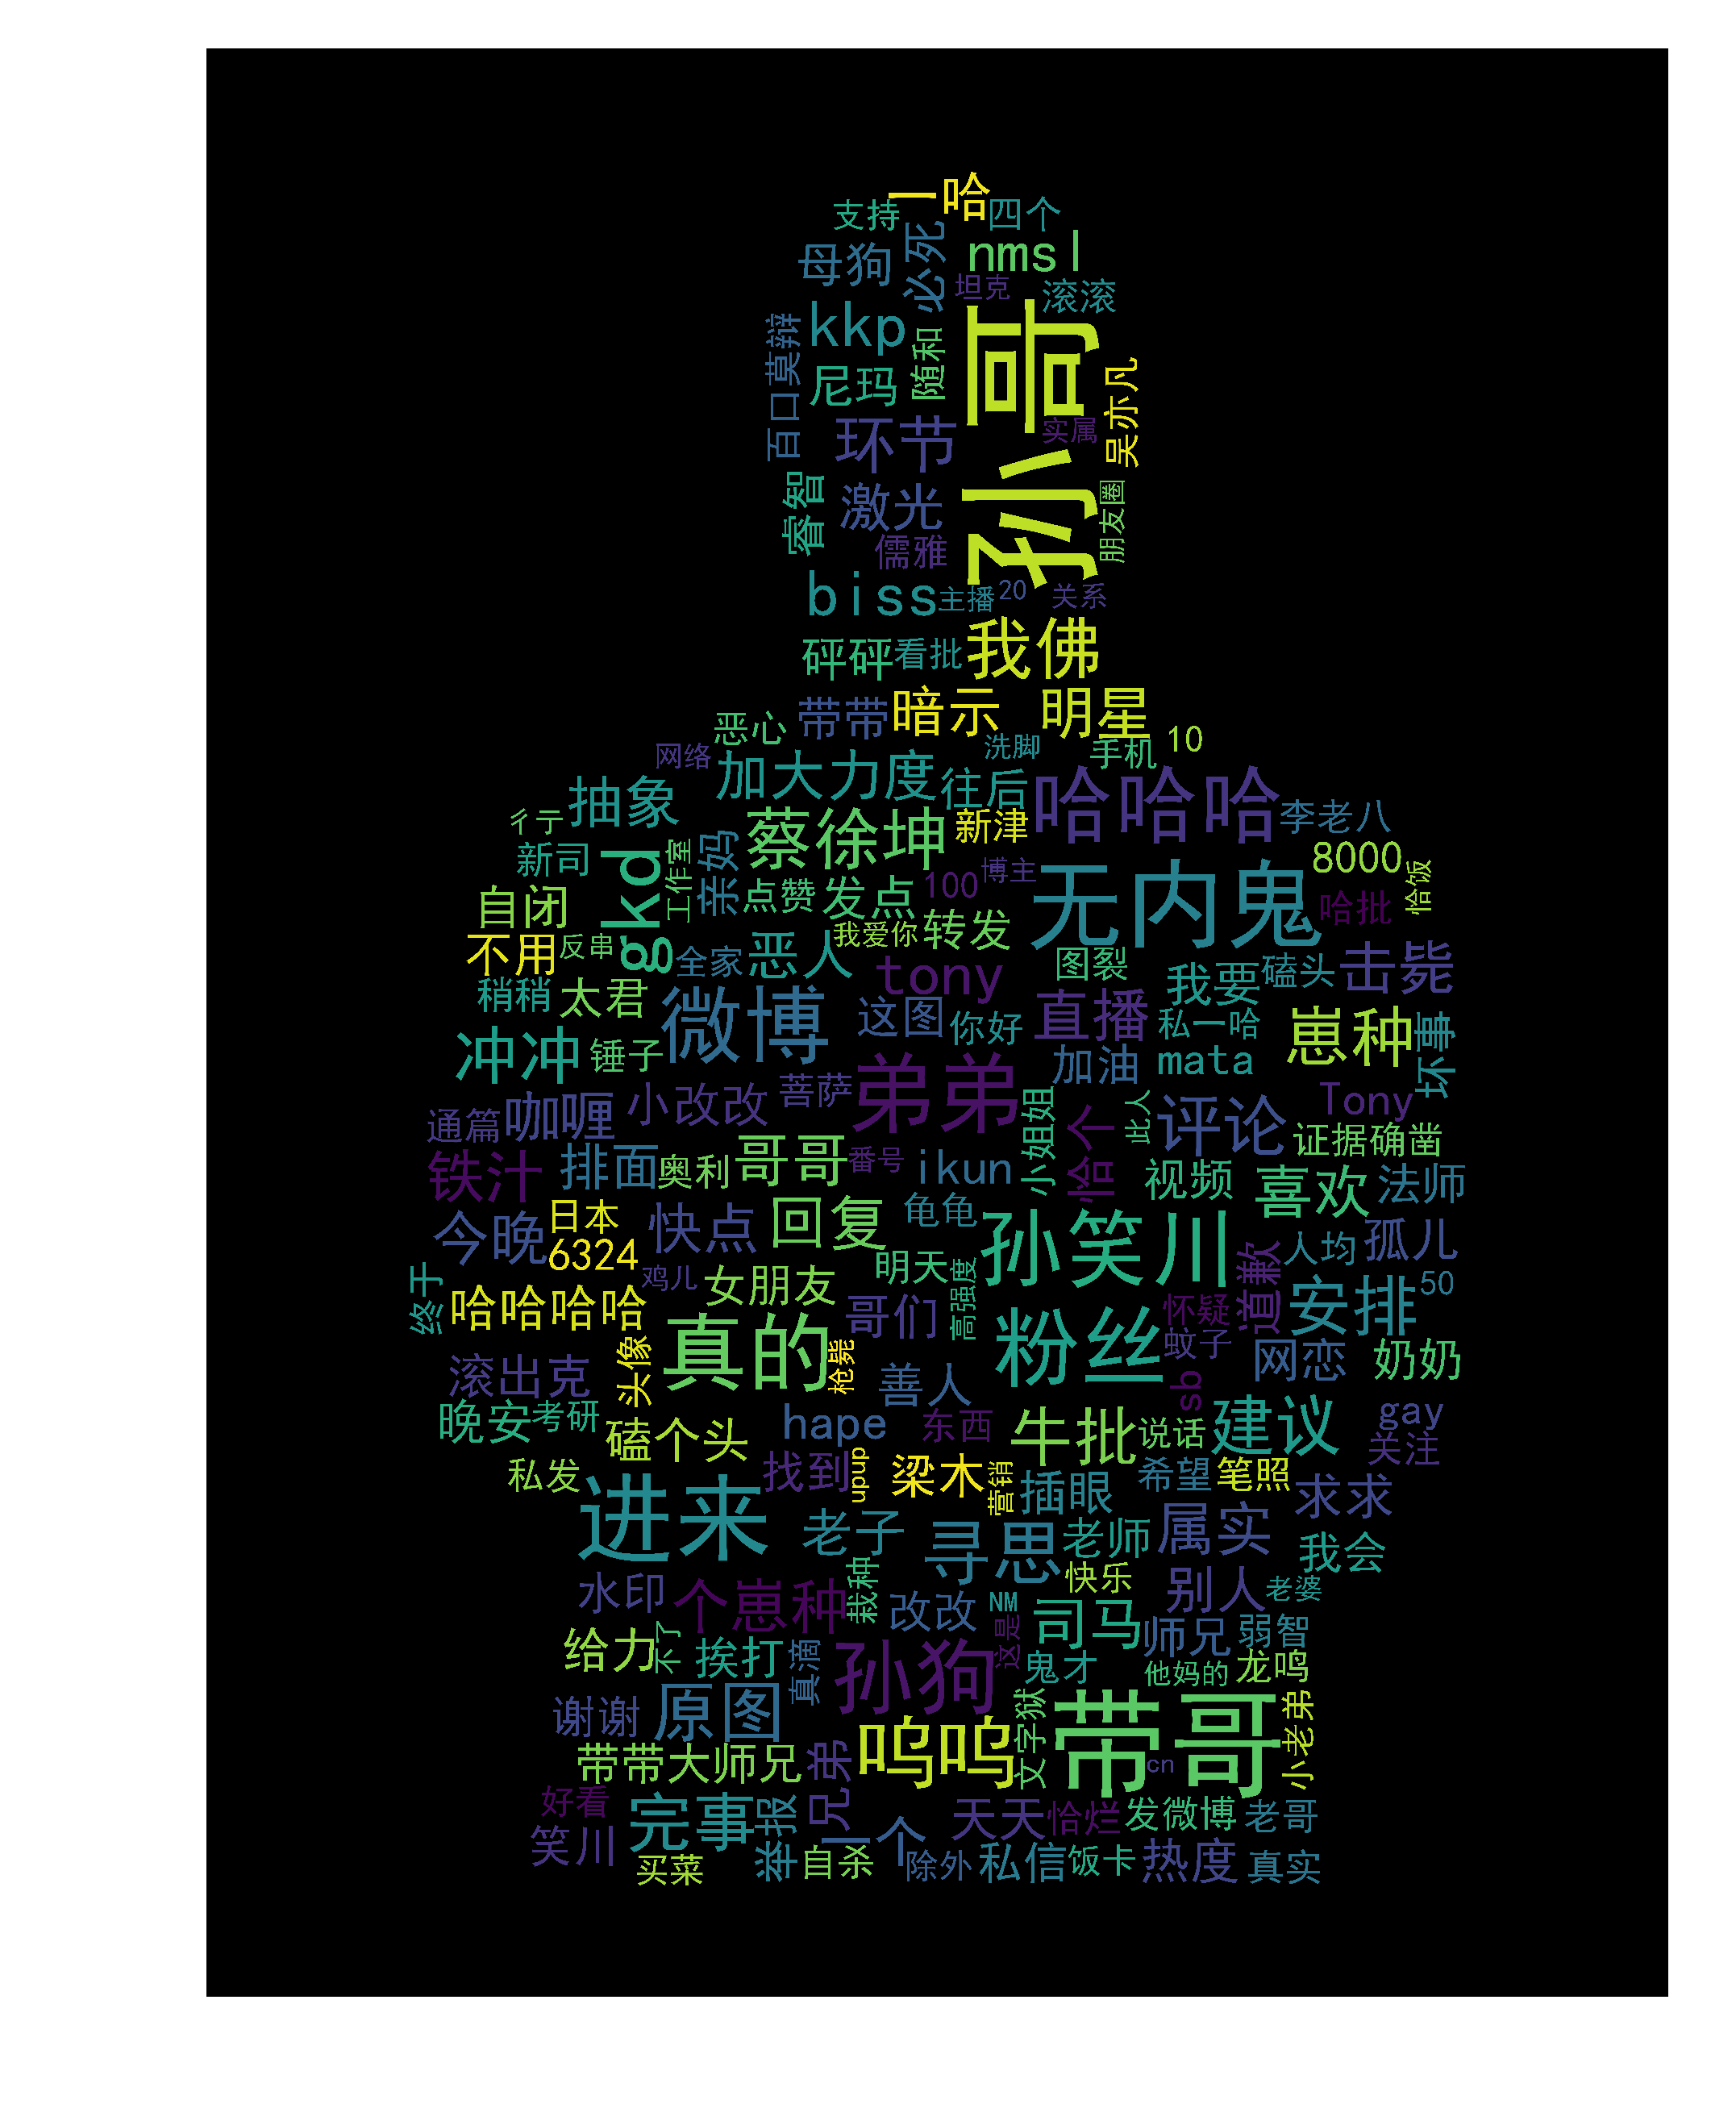

In [13]:
create_wordcloud(dict(tags), mask = 'sxc-mask.jpg', save_name='sxc-wordcloud.png')